In [3]:
import numpy as np 
import pandas as pd 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print("Number of Null values present in the dataset are", df.isnull().sum().sum())

Number of Null values present in the dataset are 0


In [9]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

In [10]:
output_notebook()

Loading BokehJS ...

In [11]:
from math import pi
fraud_and_not_fraud = {'Fraud' : df['Class'].value_counts()[1], 
                             'Not Fraud' : df['Class'].value_counts()[0]}

data = pd.Series(fraud_and_not_fraud).reset_index(name = 'value').rename(columns = {'index':'Fraud'})
data['angle'] = data['value']/data['value'].sum() * 2 * pi
data['color'] = ['skyblue', 'salmon']

In [13]:
unique = ['Fraud', 'Not Fraud']
top = [df['Class'].value_counts()[1], df['Class'].value_counts()[0]]
source = ColumnDataSource(data = dict(Fraud = unique, counts = top, color = Spectral6))

In [15]:
from scipy.stats import skew 
hist, edges = np.histogram(df['Amount'], density = True, bins = 50)
p2 = figure(
    x_axis_label = 'Amount',
    title = 'Distribution of Amount'
)

p2.quad(
    bottom = 0,
    top = hist,
    left = edges[:-1],
    right = edges[1:],
    line_color = 'white'
)

GlyphRenderer(id='p1045', ...)

In [16]:
hist, edges = np.histogram(df['Time'], density = True, bins = 50)
p3 = figure(
    x_axis_label = 'Time',
    title = 'Distribution of Time'
)

p3.quad(
    bottom = 0,
    top = hist,
    left = edges[:-1],
    right = edges[1:],
    line_color = 'white'
)

GlyphRenderer(id='p1085', ...)

In [17]:
show(gridplot([[p2,p3]]))

In [18]:
print("The skewness of the Amount feature is: ", df['Amount'].skew())
print("The skewness of the Time feature is: ", df['Time'].skew())

The skewness of the Amount feature is:  16.977724453761024
The skewness of the Time feature is:  -0.0355676180063216


In [19]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [20]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [21]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)

df.insert(0,'Scaled_Amount', scaled_amount)
df.insert(1, 'Scaled_Time', scaled_time)

df.head(5)

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(['Class'], axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, 
                                                    stratify = y)

In [23]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt 

def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Fraud', 'Fraud']
    print(classification_report(y_actual, predicted, target_names = labels))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



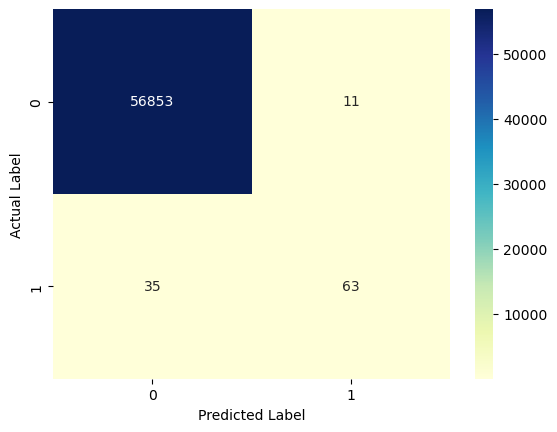

In [25]:
evaluation(y_test, prediction_lr)

Text(0.5, 1.0, 'Precision Recall Curve')

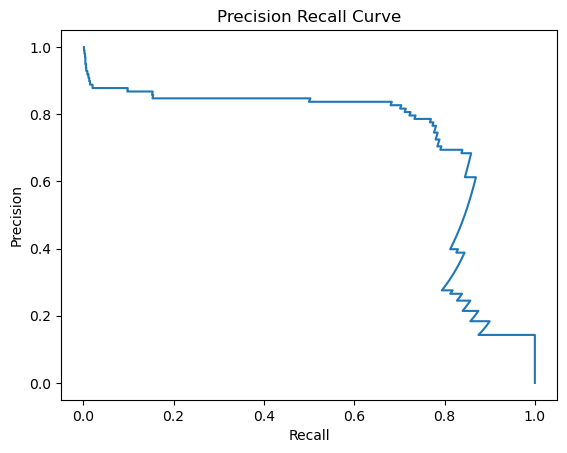

In [26]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [29]:
print("AUC score is: ", roc_auc_score(y_test, prediction_lr))

AUC score is:  0.8213318494251949


In [32]:
df.var()

Scaled_Amount    12.215067
Scaled_Time       0.311256
V1                3.836489
V2                2.726820
V3                2.299029
V4                2.004684
V5                1.905081
V6                1.774946
V7                1.530401
V8                1.426479
V9                1.206992
V10               1.185594
V11               1.041855
V12               0.998403
V13               0.990571
V14               0.918906
V15               0.837803
V16               0.767819
V17               0.721373
V18               0.702539
V19               0.662662
V20               0.594325
V21               0.539526
V22               0.526643
V23               0.389951
V24               0.366808
V25               0.271731
V26               0.232543
V27               0.162919
V28               0.108955
Class             0.001725
dtype: float64

In [33]:
from sklearn.feature_selection import RFE

In [42]:
print("AUC score is: ", roc_auc_score(y_test, prediction_lr))

AUC score is:  0.8213318494251949
